# 1. Linear Regression

### Implement linear regression on the housing dataset (house price prediction with 2-dim features(square feet and number of bedrooms) )

#### 2D Housing Data 
- Features (x1 -> square feet, x2 -> number of bedrooms)
- Price (y -> Selling price)

In [4]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True
# load data using numpy
data = np.loadtxt('housing_prices.txt', delimiter=',')
X1 = data[:, 0]
X2 = data[:, 1]
Y  = data[:, 2]
tests_count = 10      # Test count
total_count = len(Y)
train_count = len(Y) - tests_count 

# Training Set
x1_train = X1[np.arange(0,train_count)]
x2_train = X2[np.arange(0,train_count)]
y_train  =  Y[np.arange(0,train_count)]

# Test Set
x1_tests = X1[np.arange(train_count,total_count)]
x2_tests = X2[np.arange(train_count,total_count)]
y_tests  =  Y[np.arange(train_count,total_count)]

print('Total\t: ', total_count)
print('Test \t: ', len(y_tests))
print('Train\t: ', len(y_train))

Total	:  47
Test 	:  10
Train	:  37


#### (a) Visualize Data
- 2D plots of each dimension


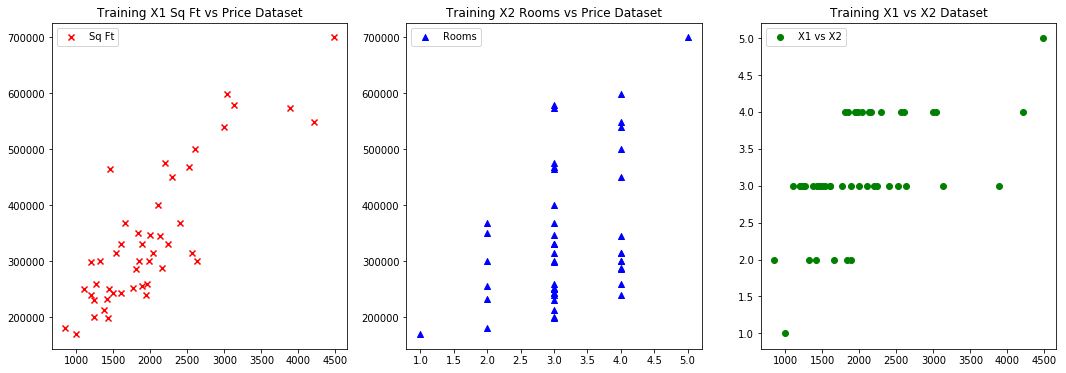

In [5]:
# Plot X1,X2 vs Y
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(18,6))
ax1.scatter(X1, Y, color = 'r',marker='x', label = 'Sq Ft')
ax1.set_title('Training X1 Sq Ft vs Price Dataset')
ax1.legend() 
ax2.scatter(X2, Y, color = 'b',marker='^', label = 'Rooms')
ax2.set_title('Training X2 Rooms vs Price Dataset')
ax2.legend() 
ax3.scatter(X1, X2, color = 'g',marker='o', label = 'X1 vs X2')
ax3.set_title('Training X1 vs X2 Dataset')
ax3.legend()    

- 3D mesh plot for X1, X2 & Y

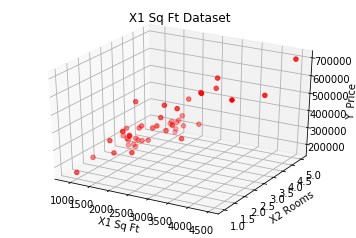

In [6]:
# Plot X1,X2, Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='r', marker='o')
ax.set_title(' X1 Sq Ft Dataset')
ax.set_xlabel('X1 Sq Ft')
ax.set_ylabel('X2 Rooms')
ax.set_zlabel('Y  Price')
plt.show()

#### (b) Linear Loss Function with update rule 

- Least square based loss function

$\hat{y} = \theta^{T} x = \theta_0 + \theta_1 x_1$

- Update rule for the weight

$\hat{\theta_{i+1}} = \hat{\theta_i} - \alpha\frac{1}{N}{{\sum}}_{n=1}^{N}( \hat{y_i} - y_i) {x_i}$

$\alpha = learning rate \\
{N} = Count for average $


#### (c) Using the update rule, implement and train the linear regression model.

In [15]:
import random

# Initialize our perceptron
one_train = np.empty(len(x1_train)); one_train.fill(0)
x_train = np.vstack((one_train, x1_train, x2_train))
print(x_train.shape)

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    for i in range(num_iters):
        predictions = X.dot(theta).flatten()
        #print(predictions.shape)
        errors_x0 = (predictions - y) * X[:, 0].reshape(37,1)
        errors_x1 = (predictions - y) * X[:, 1].reshape(37,1)
        errors_x2 = (predictions - y) * X[:, 2].reshape(37,1)
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x0.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[2][0] = theta[2][0] - alpha * (1.0 / m) * errors_x2.sum()
        print(i,'.) ',theta.T)
    return theta

num_iters = 7
learning_rate = 0.001
w_1 = np.matrix([[1],[1],[1]])
x_train1 = np.vstack((one_train, x1_train, x2_train))

print("Training the Model")
print("Iterations:",num_iters)
print("Learning Rate:", learning_rate)

w_updated = gradient_descent(x_train1.T, y_train.reshape(1,37), w_1, learning_rate, num_iters)
print('Updated W Parameters with b: \n',w_updated)

(3, 37)
Training the Model
Iterations: 7
Learning Rate: 0.001
0 .)  [[     1 772043   1123]]
1 .)  [[          1 -2147483648    -5068454]]
2 .)  [[          1 -2147483648 -2147483648]]
3 .)  [[          1 -2147483648 -2147483648]]
4 .)  [[          1 -2147483648 -2147483648]]
5 .)  [[          1 -2147483648 -2147483648]]
6 .)  [[          1 -2147483648 -2147483648]]
Updated W Parameters with b: 
 [[          1]
 [-2147483648]
 [-2147483648]]


#### (d) Data Normalization

- Subtract the mean value of each feature from the dataset
- After subtracting the mean, additionally scale the feature values by their respective standard deviations

In [39]:
# Mean
x1_train_mn = np.mean(x1_train)
x2_train_mn = np.mean(x2_train)
# Std Deviation
x1_train_std = np.std(x1_train)
x2_train_std = np.std(x2_train)
# Normalization by scaling using the standard deviation
x1_train_nrm = (x1_train - x1_train_mn)/x1_train_std
x2_train_nrm = (x2_train - x2_train_mn)/x2_train_std

print("Range of X1:",np.min(x2_train_nrm),np.max(x2_train_nrm))
print("Range of X2:",np.min(x1_train_nrm),np.max(x1_train_nrm))

nrm_num_iters = 20
nrm_learning_rate = 1
nrm_w_1 = np.matrix([[1],[1],[1]])
nrm_x_train = np.vstack((one_train, x1_train_nrm, x2_train_nrm))

print("\nTraining the Model")
print("Iterations:",nrm_num_iters)
print("Learning Rate:", nrm_learning_rate)

nrm_w_updated = gradient_descent(nrm_x_train.T, y_train.reshape(1,37), nrm_w_1, nrm_learning_rate, nrm_num_iters)
print('\nNormalized Update W Parameters with b :', nrm_w_updated.T)


Range of X1: -2.880833582083418 2.5161711033386815
Range of X2: -1.3256117172875743 3.2914795066512785

Training the Model
Iterations: 20
Learning Rate: 1
0 .)  [[     1 114005  61427]]
1 .)  [[    1 80766  -262]]
2 .)  [[     1 114147  17723]]
3 .)  [[     1 104415   -339]]
4 .)  [[     1 114189   4926]]
5 .)  [[     1 111340   -362]]
6 .)  [[     1 114202   1179]]
7 .)  [[     1 113368   -369]]
8 .)  [[     1 114205     81]]
9 .)  [[     1 113962   -371]]
10 .)  [[     1 114206   -239]]
11 .)  [[     1 114135   -371]]
12 .)  [[     1 114206   -333]]
13 .)  [[     1 114186   -371]]
14 .)  [[     1 114206   -360]]
15 .)  [[     1 114200   -371]]
16 .)  [[     1 114206   -368]]
17 .)  [[     1 114205   -371]]
18 .)  [[     1 114206   -371]]
19 .)  [[     1 114206   -371]]

Normalized Update W Parameters with b : [[     1 114206   -371]]


#### (e) Compare the results of with-normalization against without-normalization and Comment on them.
- We see that without normalization the updated parameters are very large in numbers and hence may take many iterations to converge. However in this case the convergence happens in a few iterations due to the large learning rate
- Upon normalization the update parameters are relatively smaller and it shows that the overall scale of the data has reduced and hence will benefit the convergence. In the above results convergence is almost identical and that could be due to the nature of the dataset where a general linear pattern exists.



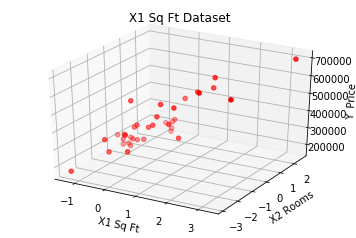

In [33]:
# Plot X1,X2, Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_train_nrm, x2_train_nrm, y_train, c='r', marker='o')
# ax.plot(x1_train_nrm, x2_train_nrm, x1_train_nrm + x2_train_nrm)
ax.set_title(' X1 Sq Ft Dataset')
ax.set_xlabel('X1 Sq Ft')
ax.set_ylabel('X2 Rooms')
ax.set_zlabel('Y  Price')
plt.show()

#### (f) Train the model using different learning rate values. How does the learning rate affect the results? 
- In the case below where LEARNING RATE = 10, we see a quick convergenge to the values as shown in part (c)
- However, when observed a LEARNING RATE = 1, we see that the convergence takes more time as shown in  part (d).
- When we set a LEARNING RATE = 0.1, the normalized data fails to converge within 20 iterations

Overall, a very small learning rate here fail to converge while a very large learning rate converges within 4 iterations. If the learning rate is too high it may not fit at all.


In [48]:
nrm_num_iters = 20
nrm_learning_rate = 10
nrm_w_1 = np.matrix([[1],[1],[1]])
nrm_x_train = np.vstack((one_train, x1_train_nrm, x2_train_nrm))

print("\nTraining the Model")
print("Iterations:",nrm_num_iters)
print("Learning Rate:", nrm_learning_rate)

nrm_w_updated = gradient_descent(nrm_x_train.T, y_train.reshape(1,37), nrm_w_1, nrm_learning_rate, nrm_num_iters)
print('\nNormalized Update W Parameters with b :', nrm_w_updated.T)


Training the Model
Iterations: 20
Learning Rate: 10
0 .)  [[      1 1140047  614270]]
1 .)  [[        1 -12444351 -11083263]]
2 .)  [[        1 173113909 167703574]]
3 .)  [[          1 -2147483648 -2147483648]]
4 .)  [[          1 -2147483648 -2147483648]]
5 .)  [[          1 -2147483648 -2147483648]]
6 .)  [[          1 -2147483648 -2147483648]]
7 .)  [[          1 -2147483648 -2147483648]]
8 .)  [[          1 -2147483648 -2147483648]]
9 .)  [[          1 -2147483648 -2147483648]]
10 .)  [[          1 -2147483648 -2147483648]]
11 .)  [[          1 -2147483648 -2147483648]]
12 .)  [[          1 -2147483648 -2147483648]]
13 .)  [[          1 -2147483648 -2147483648]]
14 .)  [[          1 -2147483648 -2147483648]]
15 .)  [[          1 -2147483648 -2147483648]]
16 .)  [[          1 -2147483648 -2147483648]]
17 .)  [[          1 -2147483648 -2147483648]]
18 .)  [[          1 -2147483648 -2147483648]]
19 .)  [[          1 -2147483648 -2147483648]]

Normalized Update W Parameters with b : 

#### we can plot the line using, y = w0 + w1.x1 + w2.x2
#### 
